# Import Necessary Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder

In [3]:
data=pd.read_csv("IRIS.csv")
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Calculates statistical values and rounds them to 3 decimal places.

In [4]:
data.describe().round(3)    

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


# Mark null values as True and returns sum of number of True values in each column.

In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Extracting all information about data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.shape

(150, 5)

In [9]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Change the catagorical data into numerical data by using OneHotEncoding.

In [10]:
data['species']=data['species'].apply({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}.get)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Dividing the data into Dependent and Independent variables.

In [11]:
x=data.drop(['species'],axis=1)
y=data['species']
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

# Dividing the cleaned data into training and testing sets.

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

# Creating first machine learning model 'Logistic Regression'.

In [14]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [47]:
log.fit(x_train,y_train)

C:\Users\younu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
predictions=log.predict(x_test)
print(predictions)    

[2 1 0 1 1 1 0 2 1 1 2 0 0 0 1 0 2 2 2 2 2 0 0 0 1 1 0 0 1 2]


# Check confusion metrics and accuracy score.

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [18]:
print(cm)

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


In [19]:
print(ac)

1.0


In [20]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier() 

In [21]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
predictions=forest.predict(x_test)
print(predictions)

[2 1 0 1 1 1 0 2 1 1 2 0 0 0 1 0 2 2 2 2 2 0 0 0 1 1 0 0 1 2]


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [24]:
print(cm)

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


In [25]:
print(ac)

1.0


In [26]:
from sklearn.svm import SVC
svm=SVC()

In [27]:
svm.fit(x_train,y_train)

SVC()

In [28]:
predictions=svm.predict(x_test)
print(predictions)

[2 1 0 1 1 1 0 2 1 1 2 0 0 0 1 0 2 2 2 2 2 0 0 0 1 1 0 0 1 2]


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [30]:
print(cm)

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


In [50]:
print(ac)

1.0


# Visualization

C:\Users\younu\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\younu\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\younu\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\younu\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\younu\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.0% of the points 

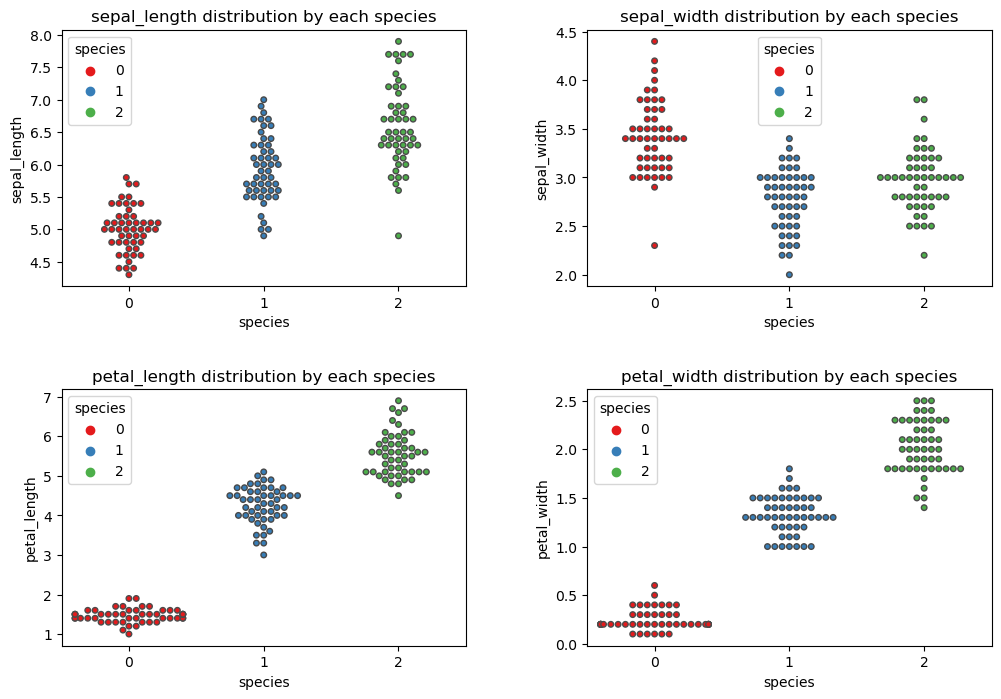

In [44]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    snr.swarmplot(x='species', y=column, data=data, linewidth=1, palette="Set1",hue='species',size=4)
    plt.title(f'{column} distribution by each species')
    
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()